In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the data
X = np.loadtxt('linearX.csv')  # Predictor variable
Y = np.loadtxt('linearY.csv')  # Response variable

In [3]:
# Normalize the data
X = (X - np.mean(X)) / np.std(X)
Y = (Y - np.mean(Y)) / np.std(Y)

In [4]:
# Function to compute cost
def compute_cost(X, Y, theta_0, theta_1):
    m = len(Y)
    predictions = theta_0 + theta_1 * X
    errors = predictions - Y
    return (1 / (2 * m)) * np.sum(errors ** 2)

In [5]:
# Batch gradient descent implementation
def gradient_descent(X, Y, lr, max_iter=1000, tol=1e-6):
    m = len(Y)
    theta_0, theta_1 = 0, 0  # Initialize parameters
    cost_history = []

    for _ in range(max_iter):
        predictions = theta_0 + theta_1 * X
        errors = predictions - Y

        # Compute gradients
        gradient_0 = (1 / m) * np.sum(errors)
        gradient_1 = (1 / m) * np.sum(errors * X)

         # Update parameters
        theta_0 -= lr * gradient_0
        theta_1 -= lr * gradient_1

        # Compute cost
        cost = compute_cost(X, Y, theta_0, theta_1)
        cost_history.append(cost)

        # Convergence check
        if len(cost_history) > 1 and abs(cost_history[-1] - cost_history[-2]) < tol:
            break

    return theta_0, theta_1, cost_history

In [6]:
# Function to plot cost vs iteration
def plot_cost_vs_iteration(cost_history, lr, title="Cost vs Iterations"):
    plt.plot(range(len(cost_history)), cost_history, label=f'lr={lr}')
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.title(title)
    plt.legend()
    plt.show()

In [7]:
# Function to plot dataset and best-fit line
def plot_fit(X, Y, theta_0, theta_1):
    plt.scatter(X, Y, color='blue', label='Data')
    plt.plot(X, theta_0 + theta_1 * X, color='red', label='Best-fit Line')
    plt.xlabel('Normalized X')
    plt.ylabel('Y')
    plt.title('Dataset and Best-fit Line')
    plt.legend()
    plt.show()

In [ ]:
# Question 1: Train the model with lr=0.5
theta_0, theta_1, cost_history = gradient_descent(X, Y, lr=0.5)
print(f"Final parameters: theta_0={theta_0}, theta_1={theta_1}")
print(f"Final cost: {cost_history[-1]}")

Final parameters: theta_0=-5.953574438999352e-14, theta_1=0.6544247150005262
Final cost: 0.28544550327780643


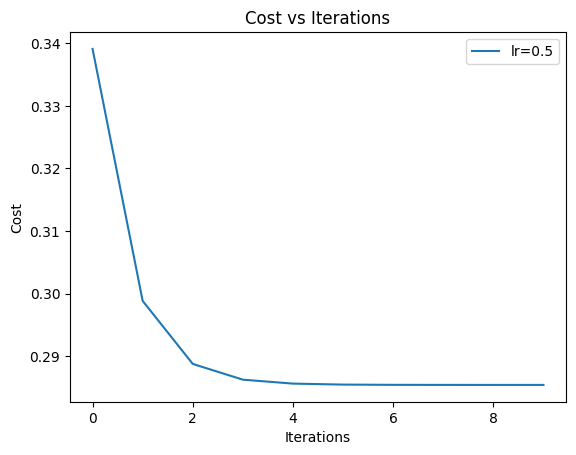

In [ ]:
# Question 3: Plot cost vs iteration for first 50 iterations
plot_cost_vs_iteration(cost_history[:50], lr=0.5)

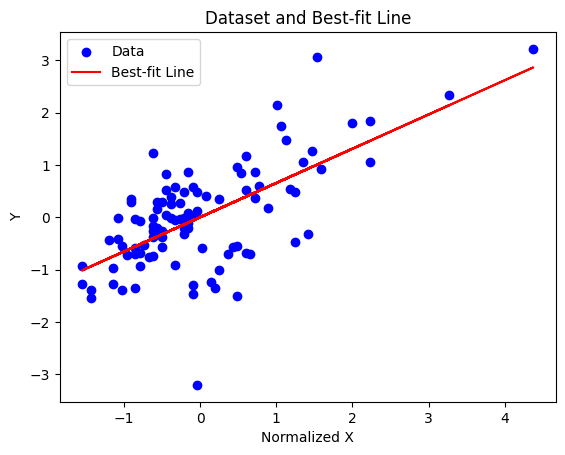

In [ ]:
# Question 4: Plot dataset and best-fit line
plot_fit(X, Y, theta_0, theta_1)

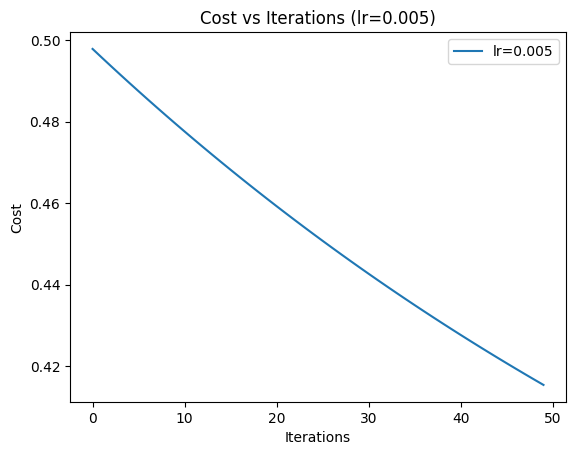

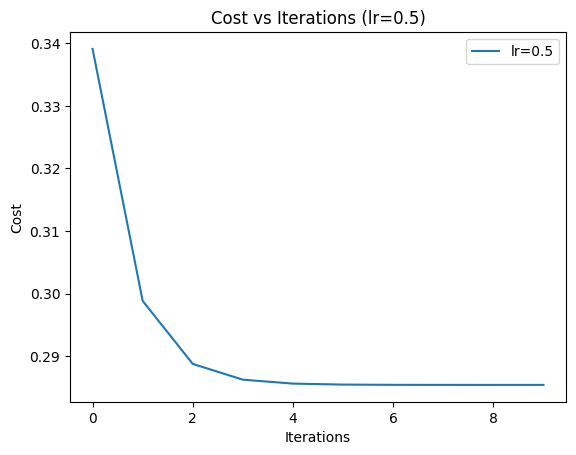

/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-34-3af955ea2f99>:6: RuntimeWarning: overflow encountered in square
  return (1 / (2 * m)) * np.sum(errors ** 2)
<ipython-input-43-72169e47646d>:24: RuntimeWarning: invalid value encountered in scalar subtract
  if len(cost_history) > 1 and abs(cost_history[-1] - cost_history[-2]) < tol:
/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-43-72169e47646d>:17: RuntimeWarning: invalid value encountered in scalar subtract
  theta_1 -= lr * gradient_1


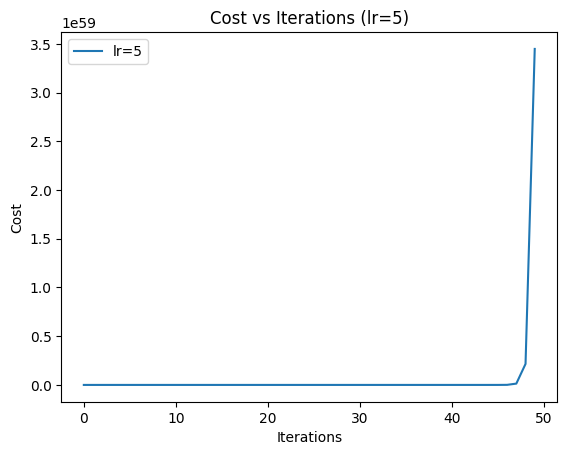

In [ ]:
# Question 5: Train with different learning rates
lrs = [0.005, 0.5, 5]
for lr in lrs:
    _, _, cost_history = gradient_descent(X, Y, lr=lr)
    plot_cost_vs_iteration(cost_history[:50], lr, title=f"Cost vs Iterations (lr={lr})")

In [8]:
# Question 6: Stochastic and Mini-Batch Gradient Descent
def stochastic_gradient_descent(X, Y, lr, max_iter=1000):
    m = len(Y)
    theta_0, theta_1 = 0, 0
    cost_history = []

    for _ in range(max_iter):
        for i in range(m):
            # Pick a single sample
            xi, yi = X[i], Y[i]

            # Compute prediction and error
            prediction = theta_0 + theta_1 * xi
            error = prediction - yi

            # Update parameters
            theta_0 -= lr * error
            theta_1 -= lr * error * xi

        # Compute cost after epoch
        cost = compute_cost(X, Y, theta_0, theta_1)
        cost_history.append(cost)

    return theta_0, theta_1, cost_history

In [9]:
def mini_batch_gradient_descent(X, Y, lr, batch_size, max_iter=1000):
    m = len(Y)
    theta_0, theta_1 = 0, 0
    cost_history = []

    for _ in range(max_iter):
        indices = np.random.permutation(m)
        X_shuffled = X[indices]
        Y_shuffled = Y[indices]

        for i in range(0, m, batch_size):
            # Select mini-batch
            X_batch = X_shuffled[i:i+batch_size]
            Y_batch = Y_shuffled[i:i+batch_size]

            # Compute predictions and errors
            predictions = theta_0 + theta_1 * X_batch
            errors = predictions - Y_batch

            # Compute gradients
            gradient_0 = (1 / len(Y_batch)) * np.sum(errors)
            gradient_1 = (1 / len(Y_batch)) * np.sum(errors * X_batch)

            # Update parameters
            theta_0 -= lr * gradient_0
            theta_1 -= lr * gradient_1

        # Compute cost after epoch
        cost = compute_cost(X, Y, theta_0, theta_1)
        cost_history.append(cost)

    return theta_0, theta_1, cost_history

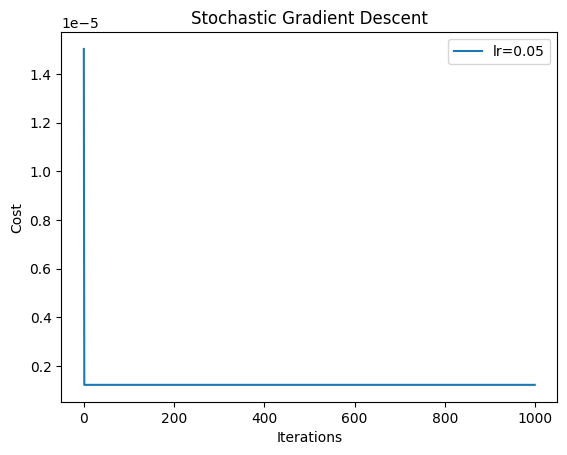

In [ ]:
# Stochastic Gradient Descent
theta_0_sgd, theta_1_sgd, cost_history_sgd = stochastic_gradient_descent(X, Y, lr=0.05)
plot_cost_vs_iteration(cost_history_sgd, lr=0.05, title="Stochastic Gradient Descent")

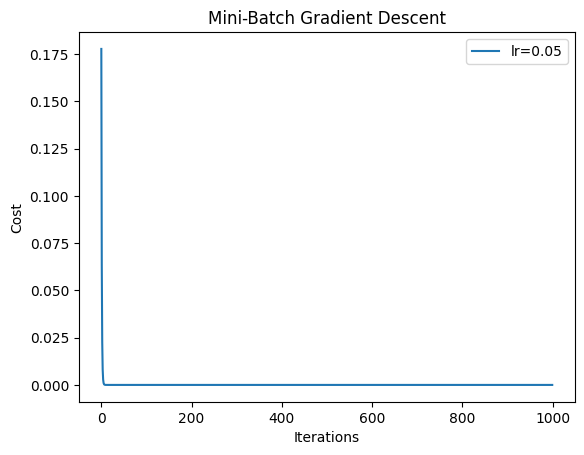

In [ ]:
# Mini-Batch Gradient Descent
theta_0_mbgd, theta_1_mbgd, cost_history_mbgd = mini_batch_gradient_descent(X, Y, lr=0.05, batch_size=10)
plot_cost_vs_iteration(cost_history_mbgd, lr=0.05, title="Mini-Batch Gradient Descent")